In [1]:
import requests  # Importing requests to extract content from a url
from bs4 import BeautifulSoup as bs # Beautifulsoup is for web scrapping...used to scrap specific content
import re
import matplotlib.pyplot as plt
from wordcloud import WordCloud


In [2]:
OnePlus_review = []

In [3]:
for i in range(1, 21):
    ip = []
    url = "https://www.amazon.in/OnePlus-Display-Storage-4000mAH-Battery/product-reviews/B07HGJK535/ref=cm_cr_getr_d_paging_btm_next_3?ie=UTF8&reviewerType=all_reviews&pageNumber=" + str(
        i)
    response = requests.get(url)
    soup = bs(response.content, "html.parser")
    reviews = soup.find_all("span",
                            attrs={
                                "class",
                                "a-size-base review-text review-text-content"
                            })  # Extracting the content under specific tags
    for i in range(len(reviews)):
        ip.append(reviews[i].text)

In [4]:
OnePlus_review = OnePlus_review + ip  # adding the reviews of one page to empty list which in future contains all the review

In [6]:
# writng reviews in a text fil
with open("OnePlus.txt","w",encoding='utf-8') as output:
    output.write(str(OnePlus_review))

In [7]:
response

<Response [200]>

In [8]:
# Joinining all the reviews into single paragraph 
ip_rev_string = " ".join(OnePlus_review)

In [9]:
ip_rev_string

'\n\n  I was so confused in between S10+ and OP7 Pro because i was worried about weight and camera but both are excellent. I am glad that i opted OnePlus7 Pro. The moment i turned on the display i was simply amazed by its quality, seriously it\'s just pleasure to eyes to watch and feel this display.Other than this performance, camera, OS, and premium look of Nebula blue all are just amazing.Go for it and trust me you not gonna regret it.\n\n \n\n  This is my personal experience I am sharing. After 10days of purchase,  the phone got hanged during call, and the system didn\'t work for half an hour,not even power and reboot button. The problem recurred after 1 week.  After investing this big amount for a phone,  this kind of experience really gets you into trouble.Also,  would advice Amazon to extend return timeline and should give 1 month for these kind of products, as these are big investment for the user.\n\n \n\n  Worst camera quality...... I thought I m getting the best phone but it\

In [10]:
import nltk
#remving unwamted symbols
ip_rev_string = re.sub("[^A-Za-z" "]+"," ",ip_rev_string).lower()

In [11]:
ip_rev_string = re.sub("[0-9" "]+"," ",ip_rev_string)

In [12]:
ip_rev_string

' i was so confused in between s and op pro because i was worried about weight and camera but both are excellent i am glad that i opted oneplus pro the moment i turned on the display i was simply amazed by its quality seriously it s just pleasure to eyes to watch and feel this display other than this performance camera os and premium look of nebula blue all are just amazing go for it and trust me you not gonna regret it this is my personal experience i am sharing after days of purchase the phone got hanged during call and the system didn t work for half an hour not even power and reboot button the problem recurred after week after investing this big amount for a phone this kind of experience really gets you into trouble also would advice amazon to extend return timeline and should give month for these kind of products as these are big investment for the user worst camera quality i thought i m getting the best phone but it s the worst one plz do go for this mobile with the amount of hyp

In [13]:
# words that contained in iphone XR reviews
ip_rew_words = ip_rev_string.split(" ")

In [14]:
ip_rew_words

['',
 'i',
 'was',
 'so',
 'confused',
 'in',
 'between',
 's',
 'and',
 'op',
 'pro',
 'because',
 'i',
 'was',
 'worried',
 'about',
 'weight',
 'and',
 'camera',
 'but',
 'both',
 'are',
 'excellent',
 'i',
 'am',
 'glad',
 'that',
 'i',
 'opted',
 'oneplus',
 'pro',
 'the',
 'moment',
 'i',
 'turned',
 'on',
 'the',
 'display',
 'i',
 'was',
 'simply',
 'amazed',
 'by',
 'its',
 'quality',
 'seriously',
 'it',
 's',
 'just',
 'pleasure',
 'to',
 'eyes',
 'to',
 'watch',
 'and',
 'feel',
 'this',
 'display',
 'other',
 'than',
 'this',
 'performance',
 'camera',
 'os',
 'and',
 'premium',
 'look',
 'of',
 'nebula',
 'blue',
 'all',
 'are',
 'just',
 'amazing',
 'go',
 'for',
 'it',
 'and',
 'trust',
 'me',
 'you',
 'not',
 'gonna',
 'regret',
 'it',
 'this',
 'is',
 'my',
 'personal',
 'experience',
 'i',
 'am',
 'sharing',
 'after',
 'days',
 'of',
 'purchase',
 'the',
 'phone',
 'got',
 'hanged',
 'during',
 'call',
 'and',
 'the',
 'system',
 'didn',
 't',
 'work',
 'for',
 'half

In [15]:
#TFIDF
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(ip_rew_words,use_idf=True,ngram_range=(1,3))


C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass input=['', 'i', 'was', 'so', 'confused', 'in', 'between', 's', 'and', 'op', 'pro', 'because', 'i', 'was', 'worried', 'about', 'weight', 'and', 'camera', 'but', 'both', 'are', 'excellent', 'i', 'am', 'glad', 'that', 'i', 'opted', 'oneplus', 'pro', 'the', 'moment', 'i', 'turned', 'on', 'the', 'display', 'i', 'was', 'simply', 'amazed', 'by', 'its', 'quality', 'seriously', 'it', 's', 'just', 'pleasure', 'to', 'eyes', 'to', 'watch', 'and', 'feel', 'this', 'display', 'other', 'than', 'this', 'performance', 'camera', 'os', 'and', 'premium', 'look', 'of', 'nebula', 'blue', 'all', 'are', 'just', 'amazing', 'go', 'for', 'it', 'and', 'trust', 'me', 'you', 'not', 'gonna', 'regret', 'it', 'this', 'is', 'my', 'personal', 'experience', 'i', 'am', 'sharing', 'after', 'days', 'of', 'purchase', 'the', 'phone', 'got', 'hanged', 'during', 'call', 'and', 'the', 'system', 'didn', 't', 'work', 'for', 'half', 'an', 'ho

In [16]:
X = vectorizer.fit_transform(ip_rew_words)

In [17]:
with open("H:\\study\\360Digitmg\\NLP\Dataset\\stop.txt","r") as sw:
    stop_words = sw.read()

In [18]:
stop_words = stop_words.split("\n")

In [19]:
stop_words

['a',
 "a's",
 'able',
 'about',
 'above',
 'according',
 'accordingly',
 'across',
 'actually',
 'after',
 'afterwards',
 'again',
 'against',
 "ain't",
 'all',
 'allow',
 'allows',
 'almost',
 'alone',
 'along',
 'already',
 'also',
 'although',
 'always',
 'am',
 'among',
 'amongst',
 'an',
 'and',
 'another',
 'any',
 'anybody',
 'anyhow',
 'anyone',
 'anything',
 'anyway',
 'anyways',
 'anywhere',
 'apart',
 'appear',
 'appreciate',
 'appropriate',
 'are',
 "aren't",
 'around',
 'as',
 'aside',
 'ask',
 'asking',
 'associated',
 'at',
 'available',
 'away',
 'awfully',
 'b',
 'be',
 'became',
 'because',
 'become',
 'becomes',
 'becoming',
 'been',
 'before',
 'beforehand',
 'behind',
 'being',
 'believe',
 'below',
 'beside',
 'besides',
 'best',
 'better',
 'between',
 'beyond',
 'both',
 'brief',
 'but',
 'by',
 'c',
 "c'mon",
 "c's",
 'came',
 'can',
 "can't",
 'cannot',
 'cant',
 'cause',
 'causes',
 'certain',
 'certainly',
 'changes',
 'clearly',
 'co',
 'com',
 'come',
 'c

In [20]:
stop_words.extend(["oneplus","mobile","time","android","phone","device","screen","battery","product","good","day","price"])

In [21]:
ip_rew_words = [w for w in ip_rew_words if not w in stop_words]

In [22]:
# Joinining all the reviews into single paragraph 
ip_rev_string = " ".join(ip_rew_words)

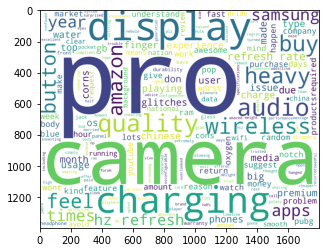

In [23]:
 #WordCloud can be performed on the string inputs.
# Corpus level word cloud

wordcloud_ip = WordCloud(
                      background_color='White',
                      width=1800,
                      height=1400
                     ).generate(ip_rev_string)

plt.imshow(wordcloud_ip)

In [27]:
# positive words # Choose the path for +ve words stored in system
with open("H://study//360Digitmg//NLP//Dataset\\positive-words.txt","r") as positive:
    positivewords = positive.read().split("\n")

In [28]:
# Positive word cloud
# Choosing the only words which are present in positive words
ip_pos_words = " ".join([w for w in ip_rew_words if w in positivewords])

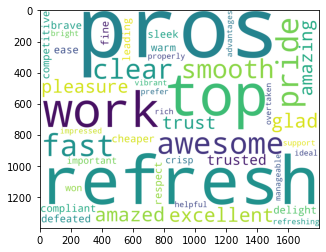

In [31]:
wordcloud_pos = WordCloud(background_color='White',
                      width=1800,
                      height=1400).generate(ip_pos_words)
plt.figure(2)
plt.imshow(wordcloud_pos)

In [32]:
#-ve wordcloud
with open("H://study//360Digitmg//NLP//Dataset\\\\negative-words.txt", "r") as neg:
      negwords = neg.read().split("\n")

In [34]:
# negative word cloud
# Choosing the only words which are present in negwords
ip_neg_in_neg = " ".join ([w for w in ip_rew_words if w in negwords])

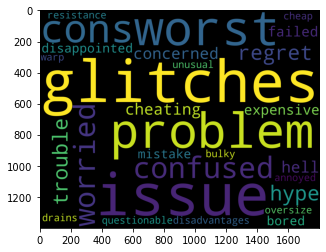

In [35]:
wordcloud_neg_in_neg = WordCloud(
                      background_color='black',
                      width=1800,
                      height=1400
                     ).generate(ip_neg_in_neg)
plt.figure(3)
plt.imshow(wordcloud_neg_in_neg)


In [36]:
#wordcloud with bigram
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [37]:
from wordcloud import WordCloud,STOPWORDS

In [38]:
WNL = nltk.WordNetLemmatizer()

In [40]:
# Lowercase and tokenize
text = ip_rev_string.lower()

In [41]:
# Remove single quote early since it causes problems with the tokenizer.
text = text.replace("'", "")

In [43]:

text

' confused op pro worried weight camera excellent glad opted pro moment turned display simply amazed quality pleasure eyes watch feel display performance camera os premium nebula blue amazing trust gonna regret personal experience sharing days purchase hanged call system didn work half hour power reboot button problem recurred week investing big amount kind experience trouble advice amazon extend return timeline give month kind products big investment user worst camera quality thought worst plz amount hype made media wastage money trusted brand don star rest market give lots features vivo oppo samsung raised compliant tech team media cheating suggest problem media forum company understand needful lots ways make understand return money update years issues due reasons awesome display extremely fast mind blowing audio playback jabra wireless bud overlooked audio quality mp player surprised quality high definition audio comparing existing galaxy premium phones audio display pro including a

In [44]:
tokens = nltk.word_tokenize(text)

In [45]:
tokens

['confused',
 'op',
 'pro',
 'worried',
 'weight',
 'camera',
 'excellent',
 'glad',
 'opted',
 'pro',
 'moment',
 'turned',
 'display',
 'simply',
 'amazed',
 'quality',
 'pleasure',
 'eyes',
 'watch',
 'feel',
 'display',
 'performance',
 'camera',
 'os',
 'premium',
 'nebula',
 'blue',
 'amazing',
 'trust',
 'gon',
 'na',
 'regret',
 'personal',
 'experience',
 'sharing',
 'days',
 'purchase',
 'hanged',
 'call',
 'system',
 'didn',
 'work',
 'half',
 'hour',
 'power',
 'reboot',
 'button',
 'problem',
 'recurred',
 'week',
 'investing',
 'big',
 'amount',
 'kind',
 'experience',
 'trouble',
 'advice',
 'amazon',
 'extend',
 'return',
 'timeline',
 'give',
 'month',
 'kind',
 'products',
 'big',
 'investment',
 'user',
 'worst',
 'camera',
 'quality',
 'thought',
 'worst',
 'plz',
 'amount',
 'hype',
 'made',
 'media',
 'wastage',
 'money',
 'trusted',
 'brand',
 'don',
 'star',
 'rest',
 'market',
 'give',
 'lots',
 'features',
 'vivo',
 'oppo',
 'samsung',
 'raised',
 'compliant',

In [46]:
text1 = nltk.Text(tokens)

In [47]:
text1

<Text: confused op pro worried weight camera excellent glad...>

In [48]:
#remove extra char and remove stop word
text_content = [' '.join(re.split("[.,;:!?‘’``''@#$%^_&*()<>{}~\n\t\\\-]",word)) for word in text1]

In [49]:

text_content

['confused',
 'op',
 'pro',
 'worried',
 'weight',
 'camera',
 'excellent',
 'glad',
 'opted',
 'pro',
 'moment',
 'turned',
 'display',
 'simply',
 'amazed',
 'quality',
 'pleasure',
 'eyes',
 'watch',
 'feel',
 'display',
 'performance',
 'camera',
 'os',
 'premium',
 'nebula',
 'blue',
 'amazing',
 'trust',
 'gon',
 'na',
 'regret',
 'personal',
 'experience',
 'sharing',
 'days',
 'purchase',
 'hanged',
 'call',
 'system',
 'didn',
 'work',
 'half',
 'hour',
 'power',
 'reboot',
 'button',
 'problem',
 'recurred',
 'week',
 'investing',
 'big',
 'amount',
 'kind',
 'experience',
 'trouble',
 'advice',
 'amazon',
 'extend',
 'return',
 'timeline',
 'give',
 'month',
 'kind',
 'products',
 'big',
 'investment',
 'user',
 'worst',
 'camera',
 'quality',
 'thought',
 'worst',
 'plz',
 'amount',
 'hype',
 'made',
 'media',
 'wastage',
 'money',
 'trusted',
 'brand',
 'don',
 'star',
 'rest',
 'market',
 'give',
 'lots',
 'features',
 'vivo',
 'oppo',
 'samsung',
 'raised',
 'compliant',

In [50]:
# Create a set of stopwords
stopwords_wc = set(STOPWORDS)
customised_words = [
    'price', 'great'
]  # If you want to remove any particular word form text which does not contribute much in meaning

In [51]:
new_stop_words = stopwords_wc.union(customised_words)

In [55]:
#remove stop words
text_content = [word for word in text_content if word not in new_stop_words]

In [59]:
len(text_content)

573

In [57]:
# Take only non-empty entries
text_content = [s for s in text_content if len(s) != 0]

In [60]:
len(text_content)

573

In [61]:
# Best to get the lemmas of each word to reduce the number of similar words
text_content = [WNL.lemmatize(t) for t in text_content]

In [62]:
nltk_tokens = nltk.word_tokenize(text)  
bigrams_list = list(nltk.bigrams(text_content))
print(bigrams_list)

[('confused', 'op'), ('op', 'pro'), ('pro', 'worried'), ('worried', 'weight'), ('weight', 'camera'), ('camera', 'excellent'), ('excellent', 'glad'), ('glad', 'opted'), ('opted', 'pro'), ('pro', 'moment'), ('moment', 'turned'), ('turned', 'display'), ('display', 'simply'), ('simply', 'amazed'), ('amazed', 'quality'), ('quality', 'pleasure'), ('pleasure', 'eye'), ('eye', 'watch'), ('watch', 'feel'), ('feel', 'display'), ('display', 'performance'), ('performance', 'camera'), ('camera', 'o'), ('o', 'premium'), ('premium', 'nebula'), ('nebula', 'blue'), ('blue', 'amazing'), ('amazing', 'trust'), ('trust', 'gon'), ('gon', 'na'), ('na', 'regret'), ('regret', 'personal'), ('personal', 'experience'), ('experience', 'sharing'), ('sharing', 'day'), ('day', 'purchase'), ('purchase', 'hanged'), ('hanged', 'call'), ('call', 'system'), ('system', 'didn'), ('didn', 'work'), ('work', 'half'), ('half', 'hour'), ('hour', 'power'), ('power', 'reboot'), ('reboot', 'button'), ('button', 'problem'), ('proble

In [63]:
dict1 = [' '.join(tup) for tup in bigrams_list]


In [64]:
dict1

['confused op',
 'op pro',
 'pro worried',
 'worried weight',
 'weight camera',
 'camera excellent',
 'excellent glad',
 'glad opted',
 'opted pro',
 'pro moment',
 'moment turned',
 'turned display',
 'display simply',
 'simply amazed',
 'amazed quality',
 'quality pleasure',
 'pleasure eye',
 'eye watch',
 'watch feel',
 'feel display',
 'display performance',
 'performance camera',
 'camera o',
 'o premium',
 'premium nebula',
 'nebula blue',
 'blue amazing',
 'amazing trust',
 'trust gon',
 'gon na',
 'na regret',
 'regret personal',
 'personal experience',
 'experience sharing',
 'sharing day',
 'day purchase',
 'purchase hanged',
 'hanged call',
 'call system',
 'system didn',
 'didn work',
 'work half',
 'half hour',
 'hour power',
 'power reboot',
 'reboot button',
 'button problem',
 'problem recurred',
 'recurred week',
 'week investing',
 'investing big',
 'big amount',
 'amount kind',
 'kind experience',
 'experience trouble',
 'trouble advice',
 'advice amazon',
 'amazon e

In [67]:
#using count vectorizer to view frq of bigrams 
from sklearn.feature_extraction.text import CountVectorizer
CountVectorizer_vect = CountVectorizer(ngram_range=(2,2))


In [68]:
bag_of_wods = CountVectorizer_vect.fit_transform(dict1)

In [69]:
CountVectorizer_vect.vocabulary_

{'confused op': 114,
 'op pro': 324,
 'pro worried': 379,
 'worried weight': 538,
 'weight camera': 525,
 'camera excellent': 69,
 'excellent glad': 164,
 'glad opted': 207,
 'opted pro': 326,
 'pro moment': 375,
 'moment turned': 303,
 'turned display': 491,
 'display simply': 146,
 'simply amazed': 445,
 'amazed quality': 8,
 'quality pleasure': 395,
 'pleasure eye': 354,
 'eye watch': 174,
 'watch feel': 515,
 'feel display': 182,
 'display performance': 143,
 'performance camera': 338,
 'premium nebula': 364,
 'nebula blue': 317,
 'blue amazing': 43,
 'amazing trust': 9,
 'trust gon': 489,
 'gon na': 214,
 'na regret': 311,
 'regret personal': 419,
 'personal experience': 340,
 'experience sharing': 169,
 'sharing day': 444,
 'day purchase': 129,
 'purchase hanged': 389,
 'hanged call': 217,
 'call system': 65,
 'system didn': 467,
 'didn work': 135,
 'work half': 536,
 'half hour': 216,
 'hour power': 239,
 'power reboot': 359,
 'reboot button': 414,
 'button problem': 58,
 'probl

In [71]:
sum_of_words = bag_of_wods.sum(axis=0)

In [73]:
word_frq  = [(word,sum_of_words[0,idx]) for word, idx in CountVectorizer_vect.vocabulary_.items()]

In [76]:
word_frq = sorted(word_frq, key = lambda x: x[1],reverse =True)

In [80]:
word_frq[:100]

[('hz refresh', 4),
 ('refresh rate', 4),
 ('wireless charging', 3),
 ('pro pro', 2),
 ('top notch', 2),
 ('gb ram', 2),
 ('pop camera', 2),
 ('apps running', 2),
 ('running background', 2),
 ('buy chinese', 2),
 ('heavy usage', 2),
 ('pro corn', 2),
 ('confused op', 1),
 ('op pro', 1),
 ('pro worried', 1),
 ('worried weight', 1),
 ('weight camera', 1),
 ('camera excellent', 1),
 ('excellent glad', 1),
 ('glad opted', 1),
 ('opted pro', 1),
 ('pro moment', 1),
 ('moment turned', 1),
 ('turned display', 1),
 ('display simply', 1),
 ('simply amazed', 1),
 ('amazed quality', 1),
 ('quality pleasure', 1),
 ('pleasure eye', 1),
 ('eye watch', 1),
 ('watch feel', 1),
 ('feel display', 1),
 ('display performance', 1),
 ('performance camera', 1),
 ('premium nebula', 1),
 ('nebula blue', 1),
 ('blue amazing', 1),
 ('amazing trust', 1),
 ('trust gon', 1),
 ('gon na', 1),
 ('na regret', 1),
 ('regret personal', 1),
 ('personal experience', 1),
 ('experience sharing', 1),
 ('sharing day', 1),
 ('d

In [89]:
#generating word cloud
word_dict = dict(word_frq)
WC_ht = 2000
WC_width = 2000
WC_mx_words = 200
wordCloud = WordCloud(background_color='White',max_words=WC_mx_words, height=WC_ht, width=WC_width, stopwords=new_stop_words)
wordCloud.generate_from_frequencies(word_dict)

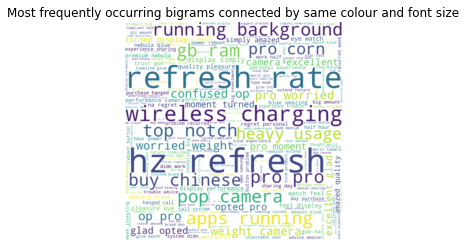

In [90]:
plt.figure(4)
plt.title('Most frequently occurring bigrams connected by same colour and font size')
plt.imshow(wordCloud, interpolation='bilinear',)
plt.axis("off")
plt.show()